# Population and Displacement - Poverty Analysis (Boston city)

This dataset provides comprehensive insights into the below poverty trends over a 10-year period from 2013 to 2022. It captures detailed poverty data segmented across various demographic and categories, offering valuable insights into socio-economic patterns and disparities. The dataset includes the following categories:

- Below poverty population vs Total population in boston city.

- Below poverty population by Age: Age groups from under 18 years, 18 to 64 years, and  65 years and over.

- Below poverty population based on Gender: Male and Female

- Below poverty population based on Race: White alone, not Hispanic or Latino, Black or African American, Asian, Hispanic or Latino origin, Some other race alone, and Two or more races.

- Below poverty population based on Education: Less than high school graduate, High school graduate, Some college, associate's degree, and Bachelor's degree or higher.

- Below poverty population based on Employment: Employed vs unemployed

- Below poverty population based on Work experience: Worked full-time, year-round in the past 12 months, Worked part-time or part-year in the past 12 months, and Did not work.

## Loading required libraries

In [58]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## Importing dataset for Boston City's 2013-2023 and combining the dataset to visualize the trends. Combined_df used for the merged datasets

- Combine data from 2013-2022.
- Add a 'Year' column to the dataset.

In [61]:
import glob

# path to the files 
path = "Boston_city_data/poverty_*.csv"
files = glob.glob(path)

# Extract year from filename and add it as a column
df_list = []
for file in files:
    year = int(file.split('_')[-1].split('.')[0]) 
    df = pd.read_csv(file)
    df['year'] = year
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)


In [63]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 8 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Label (Grouping)                                                                          655 non-null    object
 1   Boston city, Suffolk County, Massachusetts!!Total!!Estimate                               583 non-null    object
 2   Boston city, Suffolk County, Massachusetts!!Total!!Margin of Error                        583 non-null    object
 3   Boston city, Suffolk County, Massachusetts!!Below poverty level!!Estimate                 583 non-null    object
 4   Boston city, Suffolk County, Massachusetts!!Below poverty level!!Margin of Error          583 non-null    object
 5   Boston city, Suffolk County, Massachusetts!!Percent below poverty

In [65]:
combined_df.head()

,Label (Grouping),"Boston city, Suffolk County, Massachusetts!!Total!!Estimate","Boston city, Suffolk County, Massachusetts!!Total!!Margin of Error","Boston city, Suffolk County, Massachusetts!!Below poverty level!!Estimate","Boston city, Suffolk County, Massachusetts!!Below poverty level!!Margin of Error","Boston city, Suffolk County, Massachusetts!!Percent below poverty level!!Estimate","Boston city, Suffolk County, Massachusetts!!Percent below poverty level!!Margin of Error",year
0,Population for whom poverty status is determined,"651,689","±5,184","111,442","±8,138",17.1%,±1.2,2019
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,Under 18 years,"104,108","±3,210","25,043","±4,676",24.1%,±4.4,2019
3,Under 5 years,"31,264","±2,040","5,210","±1,759",16.7%,±5.5,2019
4,5 to 17 years,"72,844","±2,636","19,833","±3,973",27.2%,±5.3,2019


In [67]:
print(combined_df['year'].unique())

[2019 2018 2021 2023 2022 2013 2015 2014 2016 2017]


In [69]:
# Sort the DataFrame by the 'year' column
combined_df.sort_values(by='year', inplace=True)

# Reset the index 
combined_df.reset_index(drop=True, inplace=True)
print(combined_df['year'].unique())

print(combined_df.columns)
combined_df.head(25)

[2013 2014 2015 2016 2017 2018 2019 2021 2022 2023]
Index(['Label (Grouping)',
       'Boston city, Suffolk County, Massachusetts!!Total!!Estimate',
       'Boston city, Suffolk County, Massachusetts!!Total!!Margin of Error',
       'Boston city, Suffolk County, Massachusetts!!Below poverty level!!Estimate',
       'Boston city, Suffolk County, Massachusetts!!Below poverty level!!Margin of Error',
       'Boston city, Suffolk County, Massachusetts!!Percent below poverty level!!Estimate',
       'Boston city, Suffolk County, Massachusetts!!Percent below poverty level!!Margin of Error',
       'year'],
      dtype='object')


,Label (Grouping),"Boston city, Suffolk County, Massachusetts!!Total!!Estimate","Boston city, Suffolk County, Massachusetts!!Total!!Margin of Error","Boston city, Suffolk County, Massachusetts!!Below poverty level!!Estimate","Boston city, Suffolk County, Massachusetts!!Below poverty level!!Margin of Error","Boston city, Suffolk County, Massachusetts!!Percent below poverty level!!Estimate","Boston city, Suffolk County, Massachusetts!!Percent below poverty level!!Margin of Error",year
0,"Worked full-time, year-round in the pa...","225,670","±5,704","4,245","±1,703",1.9%,±0.7,2013
1,SEX,NaN,NaN,NaN,NaN,NaN,NaN,2013
2,65 years and over,"65,127","±1,930","11,903","±1,440",18.3%,±2.2,2013
3,18 to 64 years,"432,336","±3,386","86,576","±5,543",20.0%,±1.2,2013
4,Related children under 18 years,"104,877","±2,588","31,272","±4,001",29.8%,±3.7,2013
5,Under 18 years,"105,241","±2,553","31,636","±4,049",30.1%,±3.7,2013
6,AGE,NaN,NaN,NaN,NaN,NaN,NaN,2013
7,Population for whom poverty status is determined,"602,704","±4,124","130,115","±8,168",21.6%,±1.3,2013
8,Worked part-time or part-year in the p...,"139,462","±6,221","38,932","±4,031",27.9%,±2.6,2013
9,Did not work,"142,161","±5,493","58,010","±4,665",40.8%,±2.7,2013


In [71]:
combined_df.columns = [
    "label", "total_estimate", "total_margin_error", 
    "below_poverty_estimate", "below_poverty_margin_error",
    "percent_below_poverty_estimate", "percent_below_poverty_margin_error", "year"
]


In [73]:
def clean_string_columns(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.replace('\xa0', '', regex=False).str.strip()
    return df

# Clean the entire DataFrame
combined_df = clean_string_columns(combined_df)

# Verify the cleaned data
print(combined_df['label'].unique())

['Worked full-time, year-round in the past 12 months' 'SEX'
 '65 years and over' '18 to 64 years' 'Related children under 18 years'
 'Under 18 years' 'AGE' 'Population for whom poverty status is determined'
 'Worked part-time or part-year in the past 12 months' 'Did not work'
 'All Individuals below:' '50 percent of poverty level' 'Male'
 '125 percent of poverty level' '185 percent of poverty level'
 '200 percent of poverty level'
 'Unrelated individuals for whom poverty status is determined' 'Female'
 'Mean income deficit for unrelated individuals (dollars)'
 'Worked less than full-time, year-round in the past 12 months'
 'PERCENT IMPUTED' 'Poverty status for individuals'
 '150 percent of poverty level' 'Population 16 years and over' 'One race'
 'WORK EXPERIENCE' 'Unemployed' 'Employed'
 'Civilian labor force 16 years and over' 'EMPLOYMENT STATUS'
 "Bachelor's degree or higher" "Some college, associate's degree"
 'High school graduate (includes equivalency)'
 'RACE AND HISPANIC OR LAT

In [75]:
(combined_df.head())

,label,total_estimate,total_margin_error,below_poverty_estimate,below_poverty_margin_error,percent_below_poverty_estimate,percent_below_poverty_margin_error,year
0,"Worked full-time, year-round in the past 12 mo...","225,670","±5,704","4,245","±1,703",1.9%,±0.7,2013
1,SEX,NaN,NaN,NaN,NaN,NaN,NaN,2013
2,65 years and over,"65,127","±1,930","11,903","±1,440",18.3%,±2.2,2013
3,18 to 64 years,"432,336","±3,386","86,576","±5,543",20.0%,±1.2,2013
4,Related children under 18 years,"104,877","±2,588","31,272","±4,001",29.8%,±3.7,2013


## Visualizing total population vs below poverty line population over the years

Population Trend DataFrame:
     year  total_population  below_poverty_population  \
7    2013          602704.0                  130115.0   
76   2014          612873.0                  138625.0   
142  2015          626152.0                  128385.0   
188  2016          628333.0                  131871.0   
286  2017          642003.0                  119925.0   
370  2018          653169.0                  118946.0   
380  2019          651689.0                  111442.0   
495  2021          610081.0                  114198.0   
576  2022          608933.0                  103901.0   
586  2023          608599.0                   95207.0   

    percent_below_poverty_population  
7                              21.6%  
76                             22.6%  
142                            20.5%  
188                            21.0%  
286                            18.7%  
370                            18.2%  
380                            17.1%  
495                            1

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_11728/3683699628.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_population['total_estimate'] = total_population['total_estimate'].str.replace(',', '').astype(float)


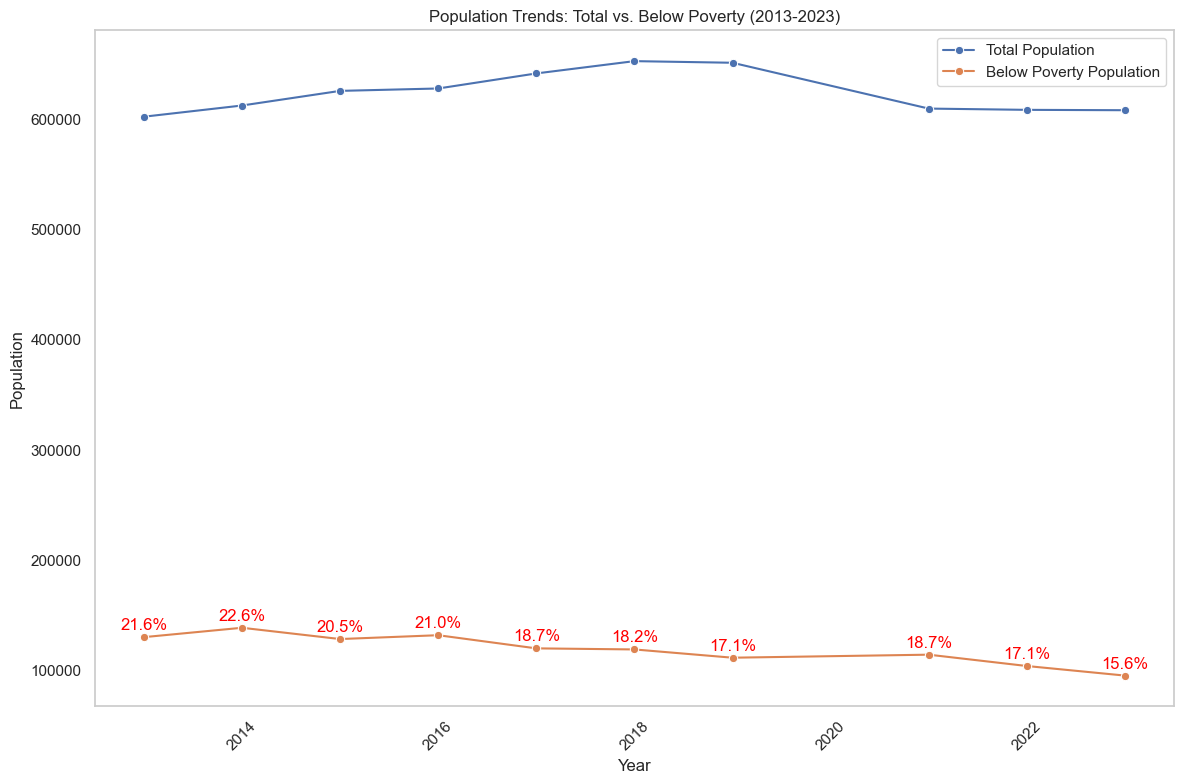

In [78]:
# total population vs bpl population over the years
total_population = combined_df[
    combined_df['label'] == "Population for whom poverty status is determined"
]

# Extract below poverty estimates for all years directly
below_poverty_population = combined_df[
    combined_df['label'] == "Population for whom poverty status is determined"
][['year', 'below_poverty_estimate']].copy()

percent_below_poverty_population = combined_df[
    combined_df['label'] == "Population for whom poverty status is determined"
][['year', 'percent_below_poverty_estimate']].copy()

# Clean the below poverty estimate values
below_poverty_population['below_poverty_estimate'] = below_poverty_population['below_poverty_estimate'].str.replace(',', '').astype(float)
percent_below_poverty_population['percent_below_poverty_estimate'] = percent_below_poverty_population['percent_below_poverty_estimate'].str.replace(',', '')

total_population['total_estimate'] = total_population['total_estimate'].str.replace(',', '').astype(float)

# Create DataFrame for plotting
population_trend = pd.DataFrame({
    'year': total_population['year'],
    'total_population': total_population['total_estimate'],
    'below_poverty_population': below_poverty_population['below_poverty_estimate'],
    'percent_below_poverty_population': percent_below_poverty_population['percent_below_poverty_estimate']
})

# Check the Population Trend DataFrame
print("Population Trend DataFrame:")
print(population_trend)

# plot
plt.figure(figsize=(12, 8))

# Plot total population
sns.lineplot(data=population_trend, x='year', y='total_population', label='Total Population', marker='o')

# Plot below poverty population
sns.lineplot(data=population_trend, x='year', y='below_poverty_population', label='Below Poverty Population', marker='o')

for i in range(len(population_trend)):
    plt.annotate(population_trend['percent_below_poverty_population'].iloc[i], 
                 (population_trend['year'].iloc[i], population_trend['below_poverty_population'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0, 5),  
                 ha='center', 
                 color='red')

# Add labels and title
plt.title("Population Trends: Total vs. Below Poverty (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### Insights 
The provided graph indicates a positive trend in poverty reduction in Boston from 2013 to 2023. The decrease from 21.6% to 15.6% represents a significant improvement in the city's socioeconomic landscape. This suggests that various measures implemented during this period have been effective in addressing poverty and improving the lives of Boston residents.

In [82]:
total_population_2013 = population_trend.loc[population_trend['year'] == 2013, 'total_population'].values[0]
below_poverty_population_2013 = population_trend.loc[population_trend['year'] == 2013, 'below_poverty_population'].values[0]

total_population_2023 = population_trend.loc[population_trend['year'] == 2023, 'total_population'].values[0]
below_poverty_population_2023 = population_trend.loc[population_trend['year'] == 2023, 'below_poverty_population'].values[0]

# Calculate percentages
percentage_below_poverty_2013 = (below_poverty_population_2013 / total_population_2013) * 100
percentage_below_poverty_2023 = (below_poverty_population_2023 / total_population_2023) * 100

#  Calculate the difference
percentage_change = percentage_below_poverty_2023 - percentage_below_poverty_2013

#  Print the results
print(f"Percentage Below Poverty Line in 2013: {percentage_below_poverty_2013:.2f}%")
print(f"Percentage Below Poverty Line in 2023: {percentage_below_poverty_2023:.2f}%")
print(f"Change in Percentage from 2013 to 2023: {percentage_change:.2f}%")

Percentage Below Poverty Line in 2013: 21.59%
Percentage Below Poverty Line in 2023: 15.64%
Change in Percentage from 2013 to 2023: -5.94%


## Poverty Rate trends based on age groups

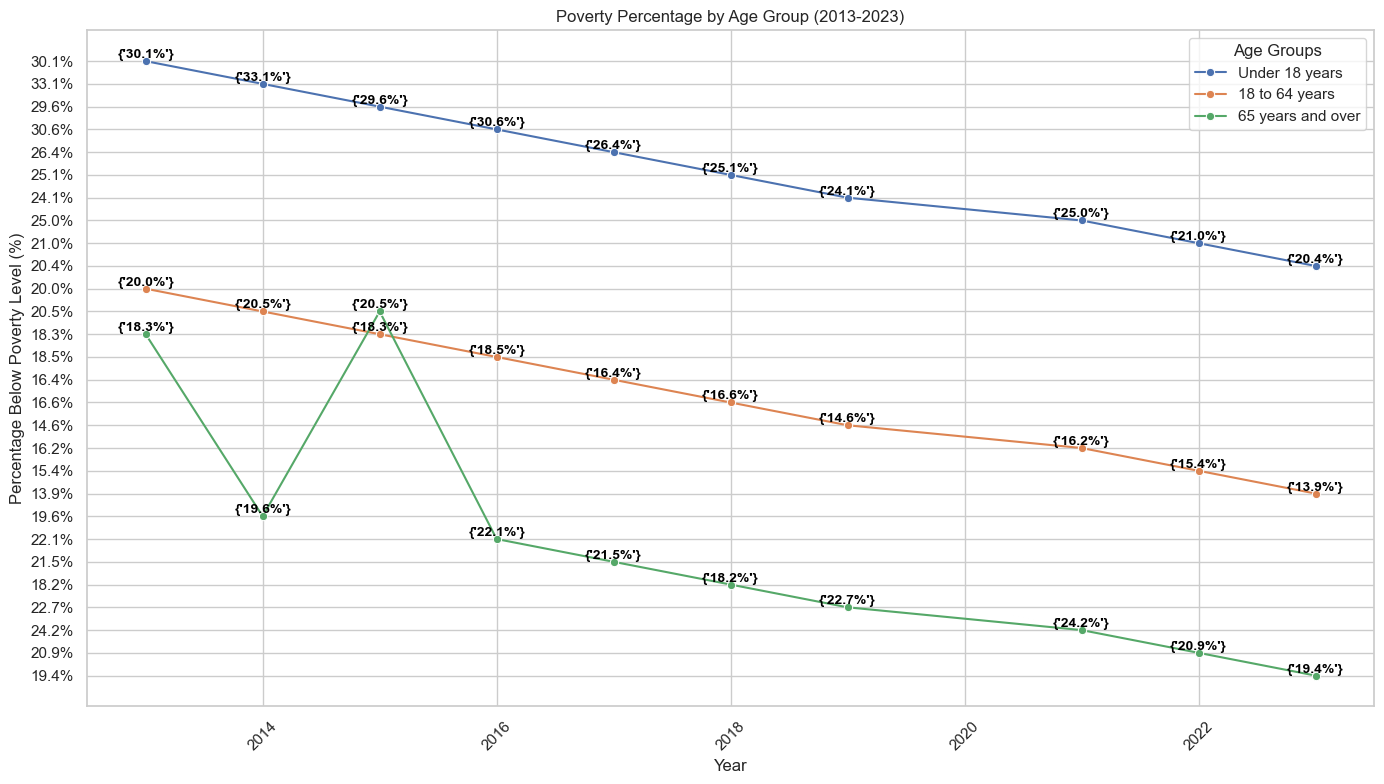

In [85]:
# Define the specific age categories to filter (adjusted based on your data)
desired_age_groups = ['Under 18 years', '18 to 64 years', '65 years and over']

# Filter the data for only these desired age groups
filtered_df = combined_df[combined_df['label'].isin(desired_age_groups)]

# Initialize plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot each desired age group separately
for age_group in desired_age_groups:
    age_group_data = filtered_df[filtered_df['label'] == age_group]
    sns.lineplot(
        data=age_group_data,
        x='year',
        y='percent_below_poverty_estimate',
        label=age_group,
        marker='o'
    )
    
    # Annotate each data point with the percentage value
    for index, row in age_group_data.iterrows():
        plt.text(row['year'], row['percent_below_poverty_estimate'], 
                 {row['percent_below_poverty_estimate']},  # Format as percentage with one decimal point
                 horizontalalignment='center', 
                 verticalalignment='bottom', 
                 size='small', color='black', weight='semibold')

# Add plot labels and title
plt.title("Poverty Percentage by Age Group (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Percentage Below Poverty Level (%)")
plt.xticks(rotation=45)
plt.legend(title="Age Groups")
plt.grid(True)
plt.tight_layout()
plt.show()


### Insights 
The graph reveals a significant disparity in poverty rates across different age groups in Boston. Notably, the under-18 age group consistently experiences the highest poverty rate, followed by the 18-64 age group. In contrast, the 65-and-over age group exhibits the lowest poverty rate. Several factors contribute to this trend, including limited educational attainment, a competitive job market, the high cost of living, and potential inadequacies in social safety net programs. Addressing these factors through targeted interventions, such as increased access to education and job training, affordable housing, and robust social safety net programs, can help reduce poverty rates among younger populations in Boston.

## Poverty trends based on gender

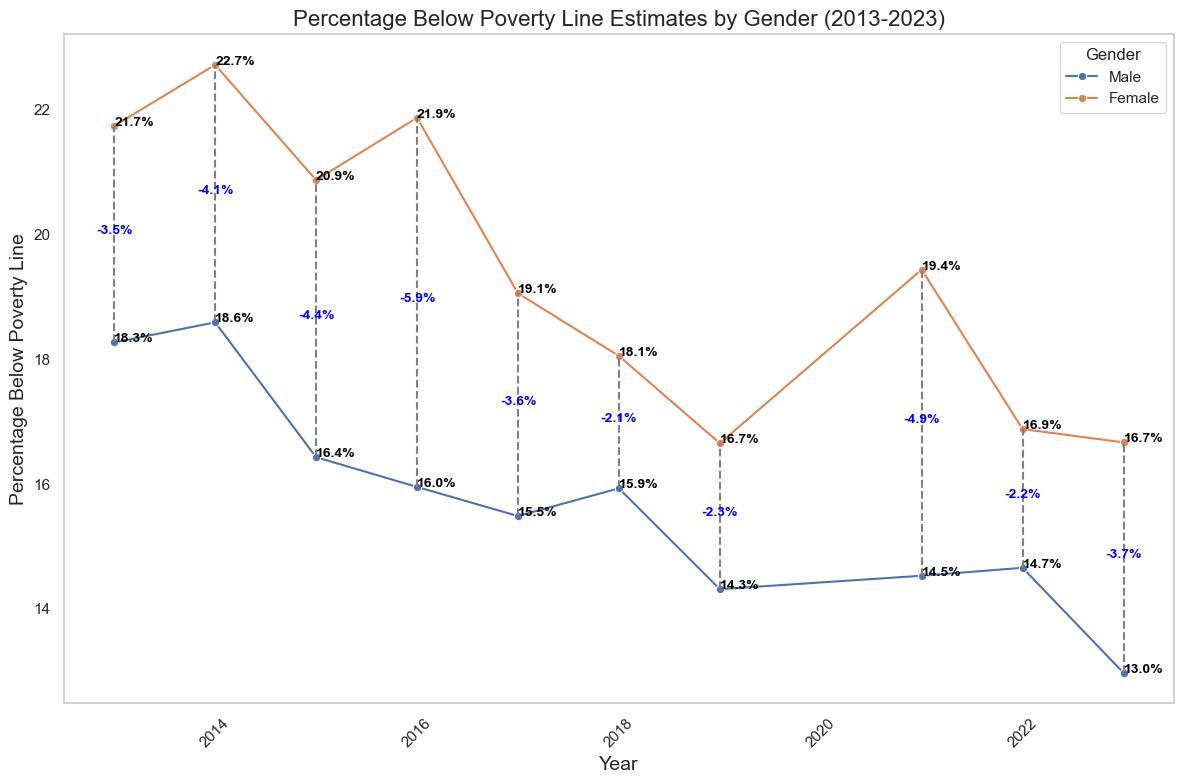

In [33]:
male_data = combined_df[combined_df['label'] == 'Male']
female_data = combined_df[combined_df['label'] == 'Female']

# Step 2: Calculate Percentages Over the Years
# Create a list to hold results
results = []

# Function to clean and convert estimates to float
def clean_and_convert(series):
    return series.str.replace(',', '').astype(float)

# Calculate for Males
for year in male_data['year'].unique():
    total_population = clean_and_convert(male_data[male_data['year'] == year]['total_estimate']).sum()
    below_poverty_population = clean_and_convert(male_data[male_data['year'] == year]['below_poverty_estimate']).sum()
    percentage = (below_poverty_population / total_population) * 100 if total_population > 0 else 0
    results.append({'year': year, 'gender': 'Male', 'percentage_below_poverty': percentage})

# Calculate for Females
for year in female_data['year'].unique():
    total_population = clean_and_convert(female_data[female_data['year'] == year]['total_estimate']).sum()
    below_poverty_population = clean_and_convert(female_data[female_data['year'] == year]['below_poverty_estimate']).sum()
    percentage = (below_poverty_population / total_population) * 100 if total_population > 0 else 0
    results.append({'year': year, 'gender': 'Female', 'percentage_below_poverty': percentage})

# Convert results to DataFrame
percentages_df = pd.DataFrame(results)

# Pivot the DataFrame for easier calculations
pivoted_df = percentages_df.pivot(index='year', columns='gender', values='percentage_below_poverty')

# Calculate percentage difference
pivoted_df['percentage_difference'] = pivoted_df['Male'] - pivoted_df['Female']
pivoted_df.reset_index(inplace=True)

# Now we need to prepare the data for plotting
melted_data = percentages_df.copy()

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the primary line graph for percentage below poverty line
lineplot = sns.lineplot(data=melted_data, x='year', y='percentage_below_poverty', hue='gender', marker='o')

# Adding annotations for percentages
for index, row in percentages_df.iterrows():
    lineplot.text(row['year'], row['percentage_below_poverty'], f"{row['percentage_below_poverty']:.1f}%", 
                  horizontalalignment='left', size='small', color='black', weight='semibold')

# Draw lines between Male and Female percentage points
for index, row in pivoted_df.iterrows():
    plt.plot([row['year'], row['year']], [row['Male'], row['Female']], color='gray', linestyle='--')
    # Annotate the percentage difference
    plt.text(row['year'], (row['Male'] + row['Female']) / 2, 
             f"{row['percentage_difference']:.1f}%", 
             horizontalalignment='center', color='blue', fontsize=10, weight='bold')

# Set titles and labels
plt.title("Percentage Below Poverty Line Estimates by Gender (2013-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage Below Poverty Line", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.legend(title="Gender")
plt.show()

### Insights 

The graph indicates a persistent gender disparity in poverty rates in Boston, with women consistently experiencing higher rates than men. While both genders have seen a decline in poverty over time, factors such as occupational disparities, caregiving responsibilities, the wage gap, and discrimination contribute to this gender gap. To address this issue, it is essential to implement policies that promote equal pay, affordable childcare, flexible work arrangements, and combat gender bias in the workplace.

## Poverty trends based on race

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_11728/1042879216.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df['below_poverty_estimate'] = clean_and_convert(race_df['below_poverty_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_11728/1042879216.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df['total_estimate'] = clean_and_convert(race_df['total_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_11728/1042879216.py:22: SettingWi

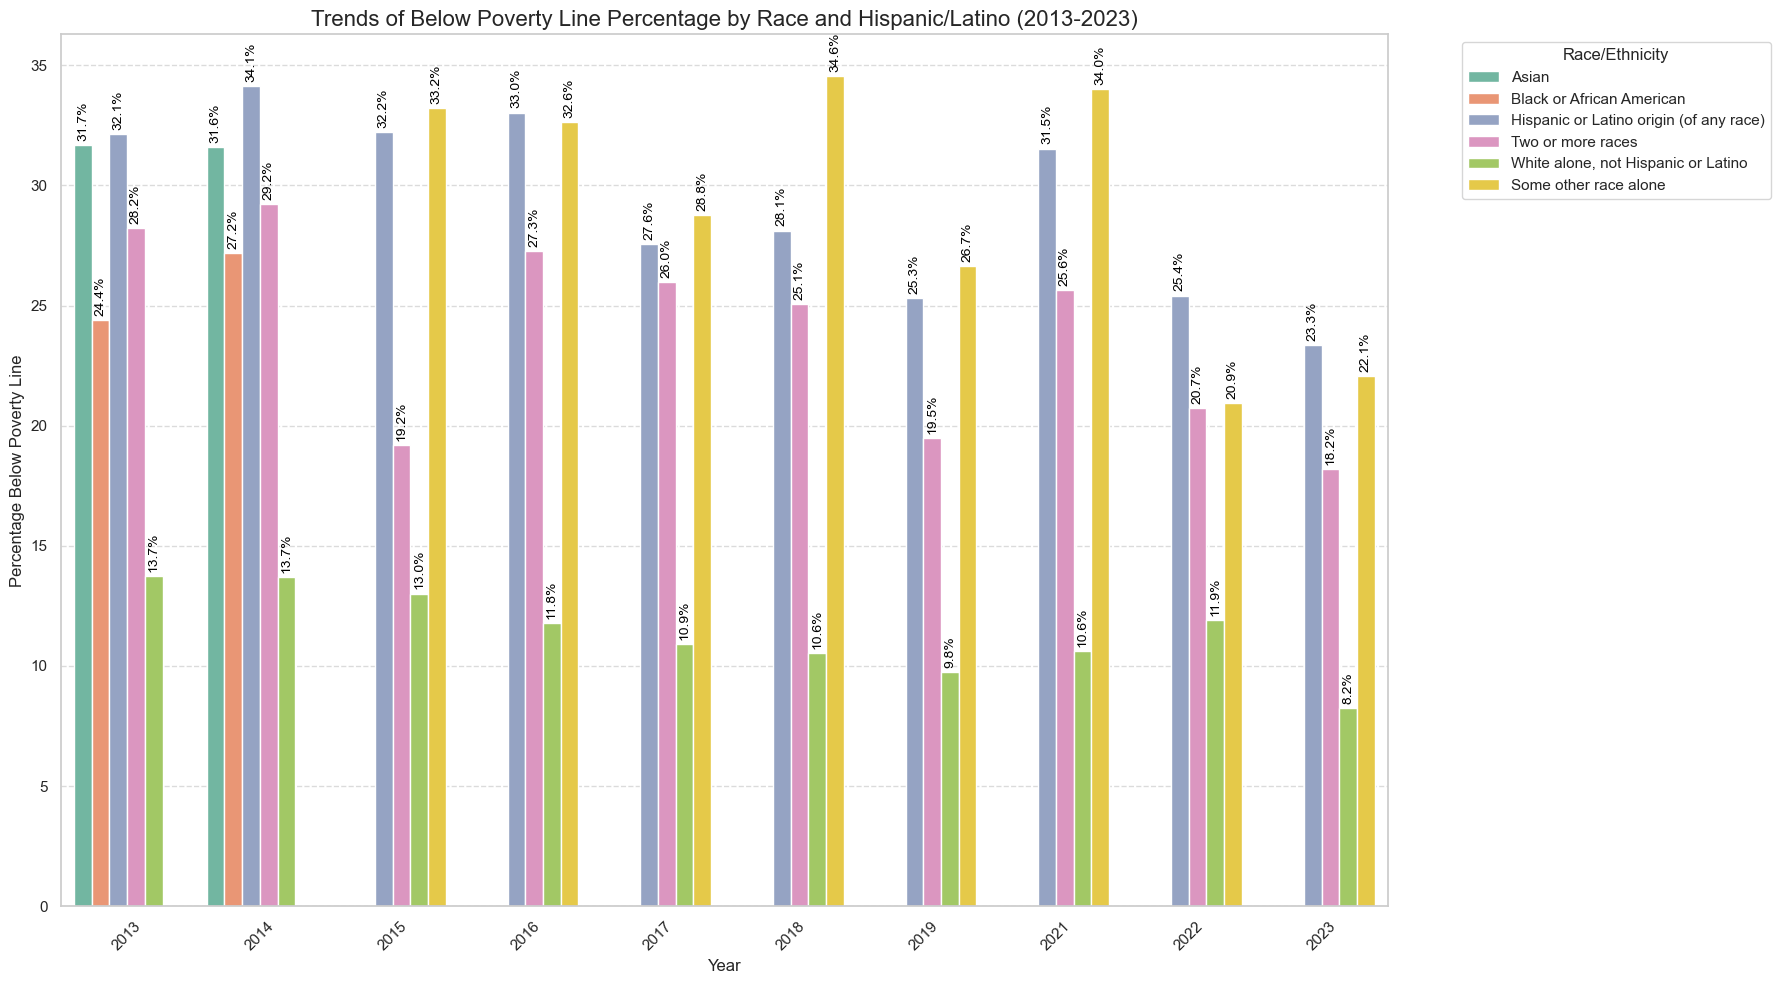

In [36]:
# Define race categories and filter the DataFrame
race_categories = [
    'White alone, not Hispanic or Latino',
    'Black or African American',
    'Asian',
    'Hispanic or Latino origin (of any race)',
    'American Indian and Alaska Native',
    'Native Hawaiian and Other Pacific Islander',
    'Some other race alone',
    'Two or more races'
]

race_df = combined_df[combined_df['label'].isin(race_categories)]

# Clean and convert data function
def clean_and_convert(column):
    column = column.str.replace(',', '', regex=False) 
    return pd.to_numeric(column, errors='coerce')      

race_df['below_poverty_estimate'] = clean_and_convert(race_df['below_poverty_estimate'])
race_df['total_estimate'] = clean_and_convert(race_df['total_estimate'])
race_df.dropna(subset=['below_poverty_estimate', 'total_estimate'], inplace=True)

# Calculate percentage below poverty line
race_df['percent_below_poverty'] = (race_df['below_poverty_estimate'] / race_df['total_estimate']) * 100

# Group and pivot data for plots
race_trend = race_df.groupby(['year', 'label'])['percent_below_poverty'].mean().reset_index()
pivot_df = race_trend.pivot(index='year', columns='label', values='percent_below_poverty')


# Bar plot with percentage annotations
plt.figure(figsize=(18, 10))
sns.barplot(data=race_trend, x='year', y='percent_below_poverty', hue='label', ci="sd", palette="Set2")
plt.title("Trends of Below Poverty Line Percentage by Race and Hispanic/Latino (2013-2023)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Below Poverty Line", fontsize=12)
plt.xticks(rotation=45)

# Annotate each bar with percentage value
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3, fontsize=10, color='black', rotation=90)

plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Insights
The bar chart highlights significant racial and ethnic disparities in poverty rates within Boston. Hispanic and Latino individuals, along with Asian Americans, consistently experience higher poverty rates compared to White residents. Several factors contribute to these disparities, including systemic racism, historical disadvantage, limited access to quality education, employment discrimination, and language barriers. Addressing these systemic issues and implementing targeted policies to promote economic mobility and social justice is crucial to reducing poverty disparities among these marginalized groups.

## Poverty trends based on education

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_11728/1857810857.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df['below_poverty_estimate'] = clean_and_convert(education_df['below_poverty_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_11728/1857810857.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df['total_estimate'] = clean_and_convert(education_df['total_estimate'])
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_11728/1857810

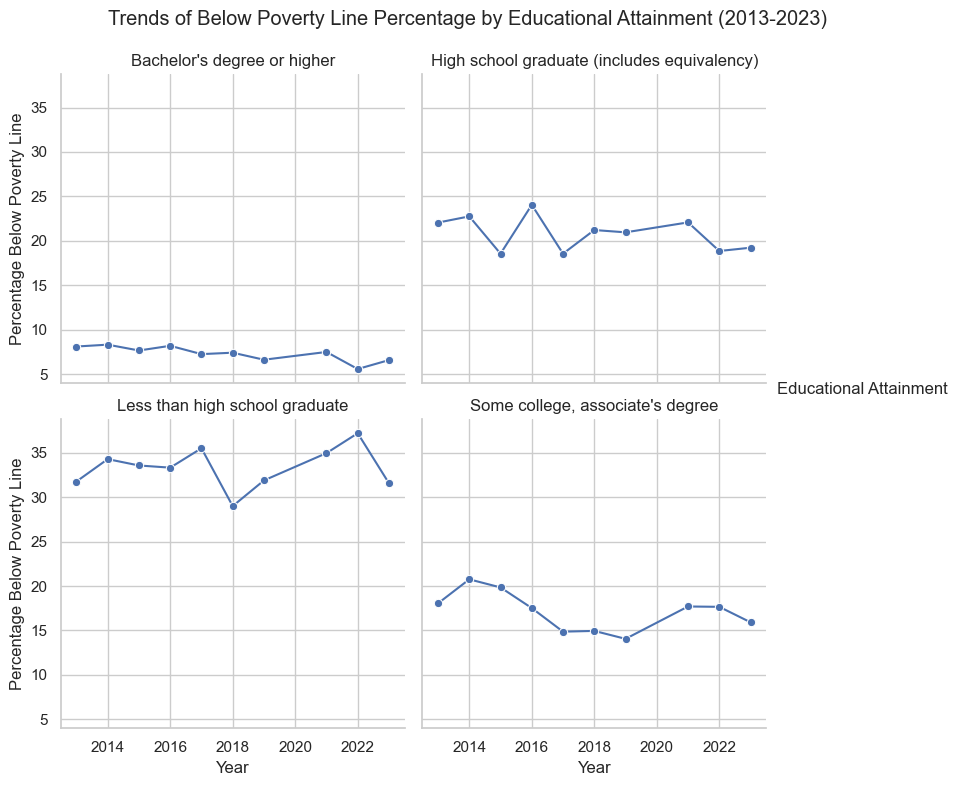

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_11728/1857810857.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=education_trend, x='year', y='percent_below_poverty', hue='label', ci="sd", palette="muted")


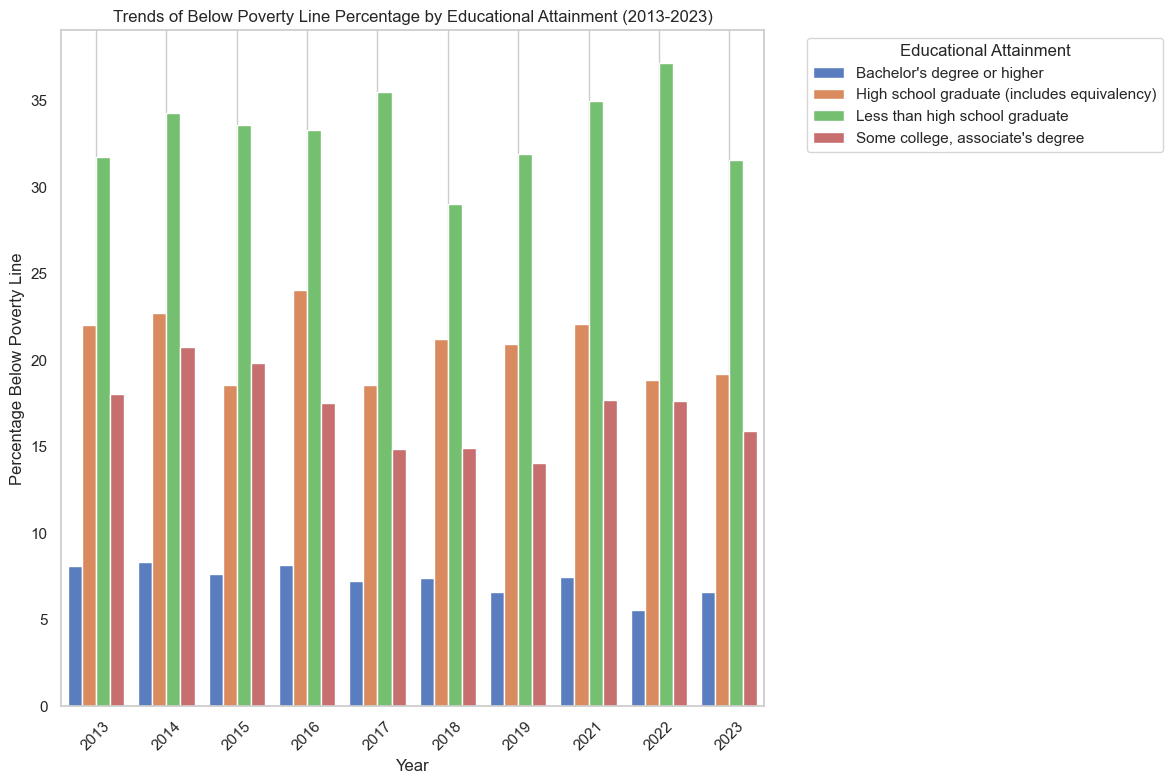

In [93]:
# education 
education_categories = [
    "Less than high school graduate",
    "High school graduate (includes equivalency)",
    "Some college, associate's degree",
    "Bachelor's degree or higher",
]

# Filter combined_df for these categories
education_df = combined_df[combined_df['label'].isin(education_categories)]

# Clean and Convert Data
# Function to clean and convert to float
def clean_and_convert(column):
    column = column.str.replace(',', '', regex=False) 
    return pd.to_numeric(column, errors='coerce') 

education_df['below_poverty_estimate'] = clean_and_convert(education_df['below_poverty_estimate'])
education_df['total_estimate'] = clean_and_convert(education_df['total_estimate'])

# Drop rows with NaN values in either column after conversion
education_df.dropna(subset=['below_poverty_estimate', 'total_estimate'], inplace=True)

# Step 3: Calculate Percentages
education_df['percent_below_poverty'] = (education_df['below_poverty_estimate'] / education_df['total_estimate']) * 100

# Group by year and educational attainment category
education_trend = education_df.groupby(['year', 'label'])['percent_below_poverty'].mean().reset_index()


# line graph plots
g = sns.FacetGrid(education_trend, col='label', col_wrap=2, height=4, sharey=True)

# Map the line plot to the grid
g.map_dataframe(sns.lineplot, x='year', y='percent_below_poverty', marker='o')

# Add titles and labels
g.set_axis_labels("Year", "Percentage Below Poverty Line")
g.set_titles(col_template="{col_name}")
g.add_legend(title='Educational Attainment')

# Add overall title
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Trends of Below Poverty Line Percentage by Educational Attainment (2013-2023)")

# Show the plot
plt.show()


#bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=education_trend, x='year', y='percent_below_poverty', hue='label', ci="sd", palette="muted")

# Add labels and title
plt.title("Trends of Below Poverty Line Percentage by Educational Attainment (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Percentage Below Poverty Line")
plt.legend(title='Educational Attainment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### Insights 
The graph clearly illustrates a strong correlation between educational attainment and poverty rates in Boston. Individuals with less than a high school education experience significantly higher poverty rates compared to those with higher levels of education. Conversely, those who have completed at least a bachelor's degree or higher have the lowest poverty rates. Factors contributing to this disparity include limited job opportunities, lower wages, and reduced access to quality healthcare and social services for individuals with lower levels of education. Investing in education and training programs, particularly for disadvantaged populations, can help break the cycle of poverty and promote economic mobility.

## Poverty trends based on employment

    Year Employment Status Below Poverty Estimate  \
0   2013          Employed                 32,911   
1   2013        Unemployed                 12,083   
2   2014          Employed                 31,656   
3   2014        Unemployed                 10,946   
4   2015          Employed                 31,646   
5   2015        Unemployed                  9,836   
6   2016          Employed                 30,044   
7   2016        Unemployed                 10,076   
8   2017          Employed                 29,260   
9   2017        Unemployed                  9,349   
10  2018          Employed                 26,890   
11  2018        Unemployed                  8,339   
12  2019          Employed                 25,315   
13  2019        Unemployed                  5,504   
14  2021          Employed                 24,490   
15  2021        Unemployed                  9,565   
16  2022          Employed                 23,039   
17  2022        Unemployed                  8,

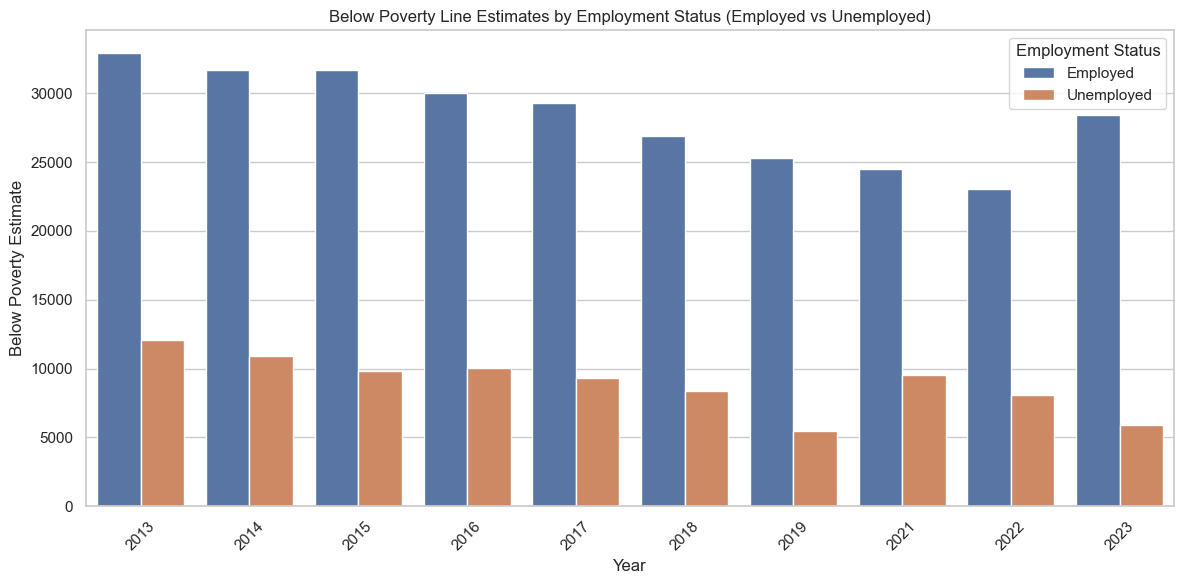

In [45]:
# Filter for employed and unemployed categories
employment_data = combined_df[
    combined_df['label'].isin(['Employed', 'Unemployed'])
]

# Create a list to hold rows for the summary DataFrame
employment_summary_rows = []

# Loop through unique years in the filtered employment data
for year in employment_data['year'].unique():
    yearly_data = employment_data[employment_data['year'] == year]

    # Extract data for Employed
    employed_row = yearly_data[yearly_data['label'] == 'Employed']
    if not employed_row.empty:
        employment_summary_rows.append({
            'Year': year,
            'Employment Status': 'Employed',
            'Below Poverty Estimate': employed_row['below_poverty_estimate'].values[0],
            'Percent Below Poverty Estimate': employed_row['percent_below_poverty_estimate'].values[0]
        })

    # Extract data for Unemployed
    unemployed_row = yearly_data[yearly_data['label'] == 'Unemployed']
    if not unemployed_row.empty:
        employment_summary_rows.append({
            'Year': year,
            'Employment Status': 'Unemployed',
            'Below Poverty Estimate': unemployed_row['below_poverty_estimate'].values[0],
            'Percent Below Poverty Estimate': unemployed_row['percent_below_poverty_estimate'].values[0]
        })

# Create a DataFrame from the list of rows
employment_summary = pd.DataFrame(employment_summary_rows)

# Display the employment summary
print(employment_summary)

employment_summary['Below Poverty Estimate'] = employment_summary['Below Poverty Estimate'].str.replace(',', '').astype(int)

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=employment_summary, 
            x='Year', 
            y='Below Poverty Estimate', 
            hue='Employment Status')

# Customize the plot
plt.title('Below Poverty Line Estimates by Employment Status (Employed vs Unemployed)')
plt.xlabel('Year')
plt.ylabel('Below Poverty Estimate')
plt.xticks(rotation=45)
plt.legend(title='Employment Status')
plt.tight_layout()

# Show the plot
plt.show()

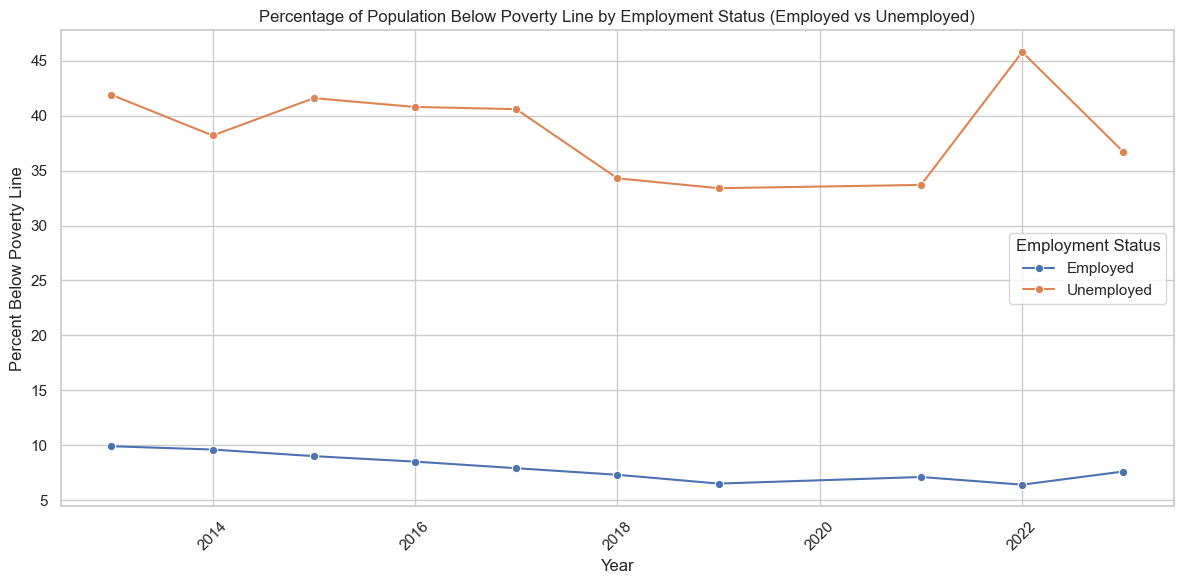

In [47]:
# Filter for employed and unemployed categories
employment_data = combined_df[
    combined_df['label'].isin(['Employed', 'Unemployed'])
]

# Create a list to hold rows for the summary DataFrame
employment_summary_rows = []

# Loop through unique years in the filtered employment data
for year in employment_data['year'].unique():
    yearly_data = employment_data[employment_data['year'] == year]

    # Extract data for Employed
    employed_row = yearly_data[yearly_data['label'] == 'Employed']
    if not employed_row.empty:
        employment_summary_rows.append({
            'Year': year,
            'Employment Status': 'Employed',
            'Below Poverty Estimate': employed_row['below_poverty_estimate'].values[0],
            'Percent Below Poverty Estimate': float(employed_row['percent_below_poverty_estimate'].values[0].strip('%'))
        })

    # Extract data for Unemployed
    unemployed_row = yearly_data[yearly_data['label'] == 'Unemployed']
    if not unemployed_row.empty:
        employment_summary_rows.append({
            'Year': year,
            'Employment Status': 'Unemployed',
            'Below Poverty Estimate': unemployed_row['below_poverty_estimate'].values[0],
            'Percent Below Poverty Estimate': float(unemployed_row['percent_below_poverty_estimate'].values[0].strip('%'))
        })

# Create a DataFrame from the list of rows
employment_summary = pd.DataFrame(employment_summary_rows)

# Set the style of seaborn
sns.set(style='whitegrid')

# Plot the percentage below poverty line by employment status over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=employment_summary, 
             x='Year', 
             y='Percent Below Poverty Estimate', 
             hue='Employment Status', 
             marker='o')

# Customize the plot
plt.title('Percentage of Population Below Poverty Line by Employment Status (Employed vs Unemployed)')
plt.xlabel('Year')
plt.ylabel('Percent Below Poverty Line')
plt.xticks(rotation=45)
plt.legend(title='Employment Status')
plt.tight_layout()

# Show the plot
plt.show()


### Insights
The provided graphs clearly demonstrate a strong correlation between employment status and poverty rates in Boston. Individuals who are unemployed exhibit significantly higher poverty rates compared to those who are employed. This disparity can be attributed to several factors, including limited income, reduced access to healthcare and social services, and the challenges associated with job search and re-entry into the workforce. To address this issue, it is crucial to implement policies that promote job creation, provide adequate unemployment benefits, and offer job training and placement services to help unemployed individuals secure stable employment.

## Poverty trends based on work experience

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_11728/3219211545.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['percent_below_poverty_estimate'] = (


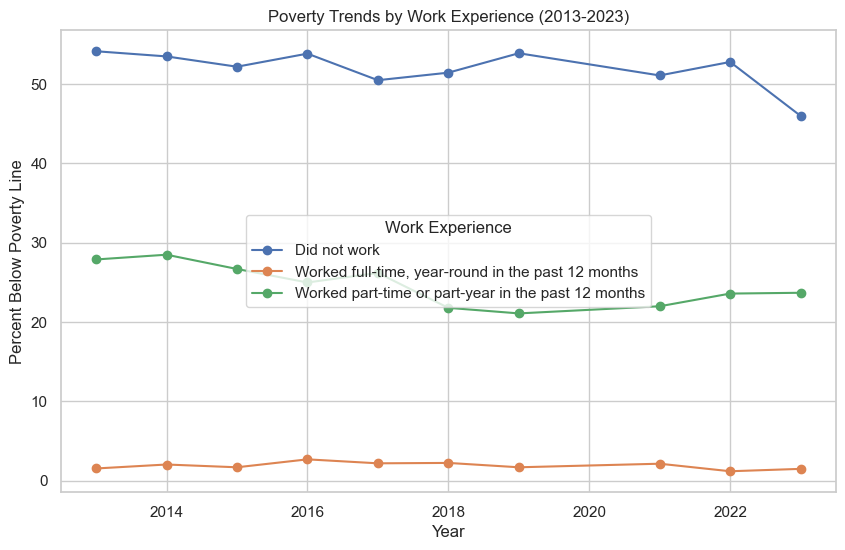

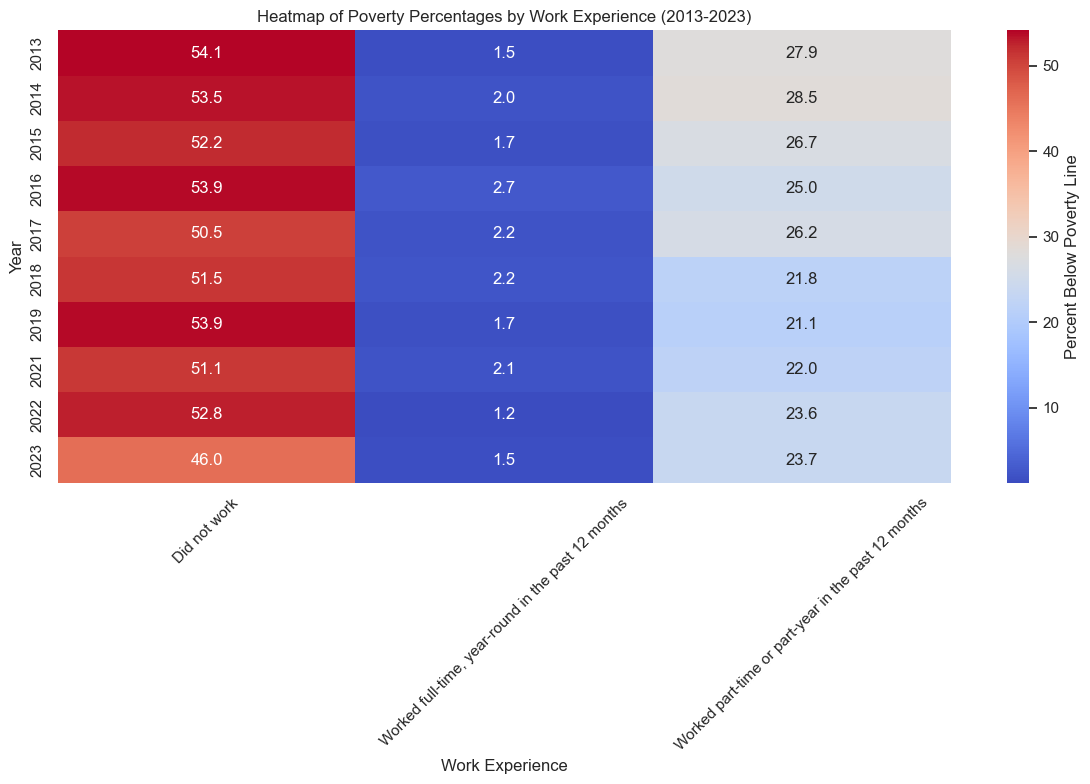

In [50]:
work_experience_categories = [
    "Worked full-time, year-round in the past 12 months",
    "Worked part-time or part-year in the past 12 months",
    "Did not work"
]
filtered_df = combined_df[combined_df['label'].isin(work_experience_categories)]

# Clean `percent_below_poverty_estimate` column by removing '%' and converting to float
filtered_df['percent_below_poverty_estimate'] = (
    filtered_df['percent_below_poverty_estimate']
    .str.replace('%', '', regex=False)
    .astype(float)
)

# pivot table for years and work experience categories
pivot_data = filtered_df.pivot_table(
    index='year',
    columns='label',
    values='percent_below_poverty_estimate'
)

# line chart for trends over years
plt.figure(figsize=(10, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)
plt.title('Poverty Trends by Work Experience (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Percent Below Poverty Line')
plt.legend(title='Work Experience')
plt.grid(True)
plt.show()

# heatmap of poverty percentages
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Percent Below Poverty Line'})
plt.title('Heatmap of Poverty Percentages by Work Experience (2013-2023)')
plt.xlabel('Work Experience')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights
The provided graph and heatmap illustrate a strong correlation between employment status and poverty rates in Boston. Individuals who did not work throughout the year exhibit significantly higher poverty rates, approaching 50% in some years. In contrast, those who worked full-time throughout the year have significantly lower poverty rates. Part-time workers experience intermediate poverty rates, approximately half that of those who did not work. These findings highlight the critical role of employment in reducing poverty. Factors such as limited income, reduced access to healthcare and social services, and the challenges associated with job search and re-entry into the workforce contribute to the higher poverty rates among unemployed and underemployed individuals.

## Conclusion
The analysis of poverty rates in Boston reveals significant disparities across various demographic groups. Younger individuals, particularly those under 18, consistently experience higher poverty rates, likely due to factors like limited educational attainment, lack of job opportunities, and dependence on social safety nets. Women, especially those with children, are also disproportionately affected by poverty, influenced by factors such as the gender pay gap, caregiving responsibilities, and limited access to affordable childcare.

Racial and ethnic disparities are also evident, with Hispanic, Latino, and Black residents experiencing higher poverty rates compared to White residents. Systemic racism, historical disadvantage, and limited access to quality education and employment opportunities contribute to these disparities.

Furthermore, educational attainment plays a crucial role in poverty rates. Individuals with lower levels of education, such as those without a high school diploma, face higher poverty risks due to limited job opportunities, lower wages, and reduced access to healthcare and social services.

Finally, employment status is a significant factor in poverty. Unemployed individuals and those working part-time or low-wage jobs are more likely to experience poverty.

To address these disparities, a comprehensive approach is needed. This includes investments in education and job training, strengthening social safety net programs, promoting equal pay and workplace protections, addressing systemic racism and discrimination, and creating affordable housing.

In [100]:
output_filename = "Poverty_Boston.csv"
combined_df.to_csv(output_filename, index=False)